In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 50

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 0.5, 2)
    prod_func = lambda x: inverse_decay(x, 0.5, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 50, 3, 1, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(100, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

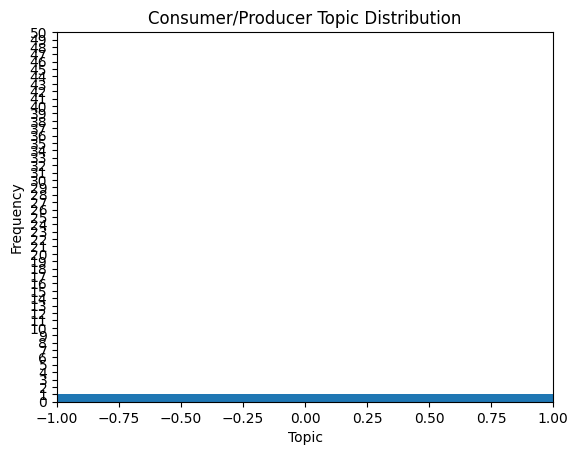

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

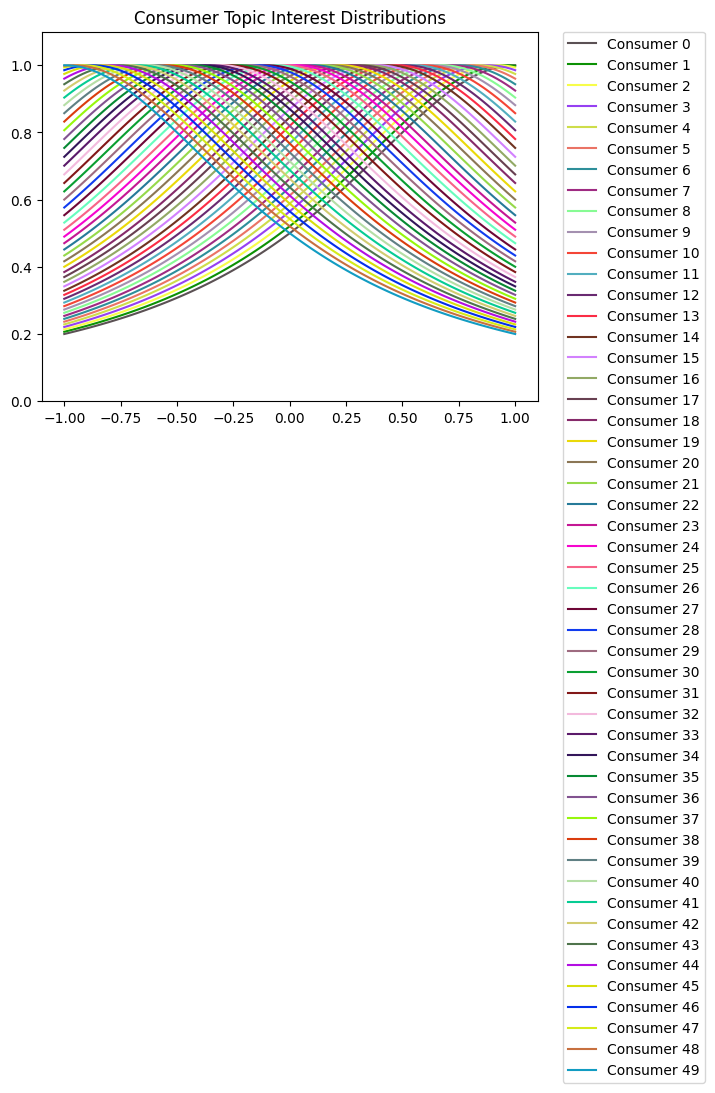

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

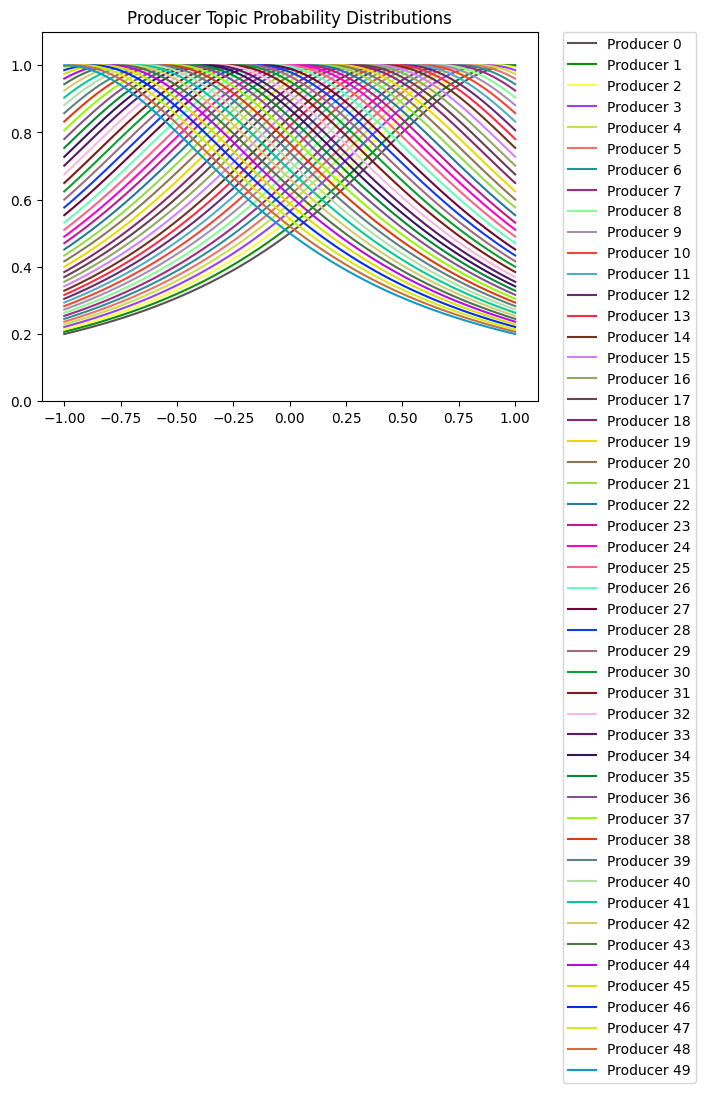

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100, topic_position='farthest')

Optimizing consumer 0
Optimizing consumer 1


KeyboardInterrupt: 

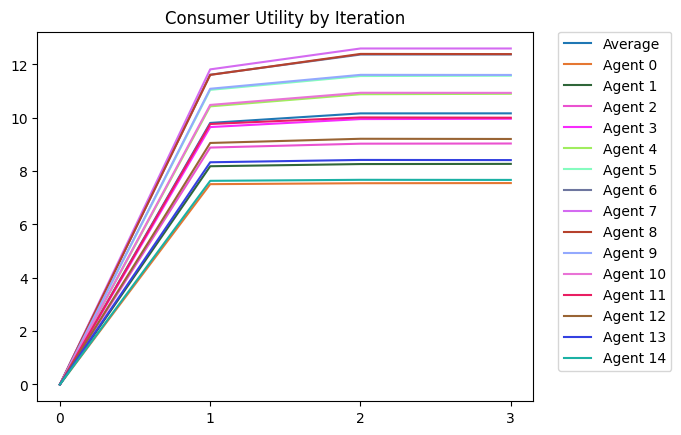

In [ ]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

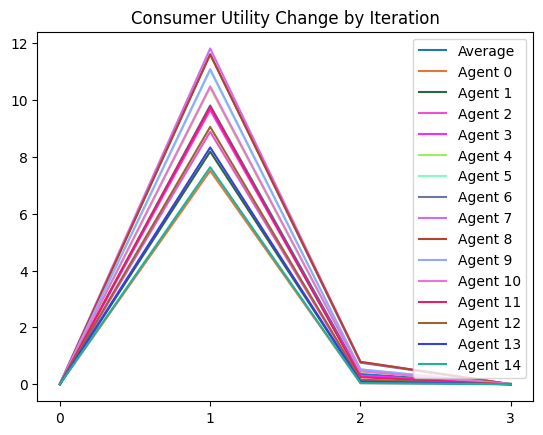

In [ ]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

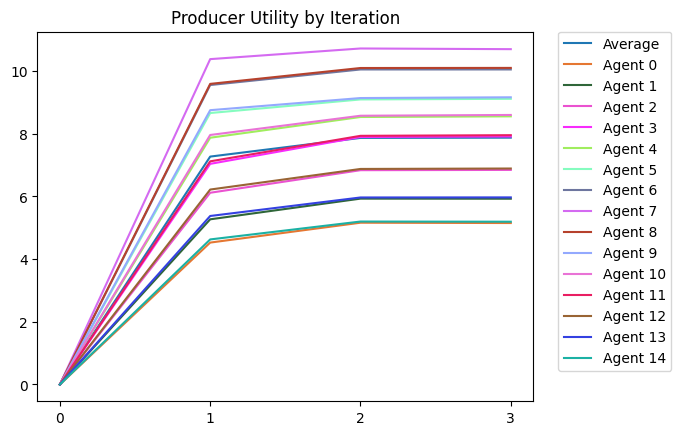

In [ ]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

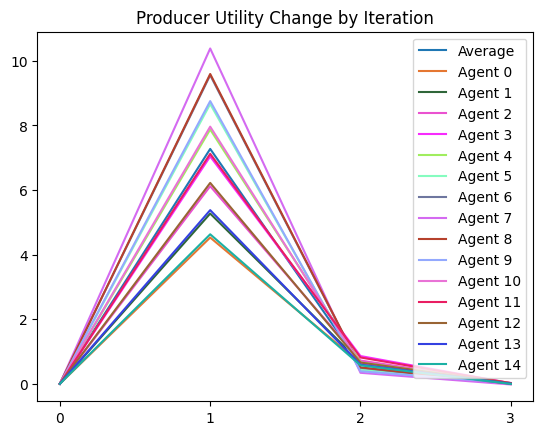

In [ ]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

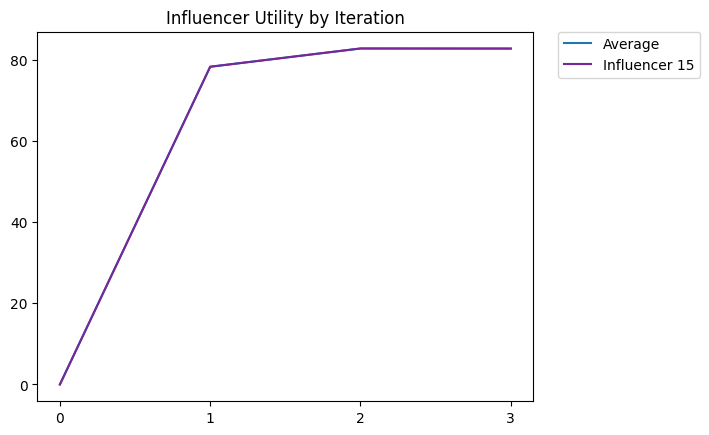

In [ ]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

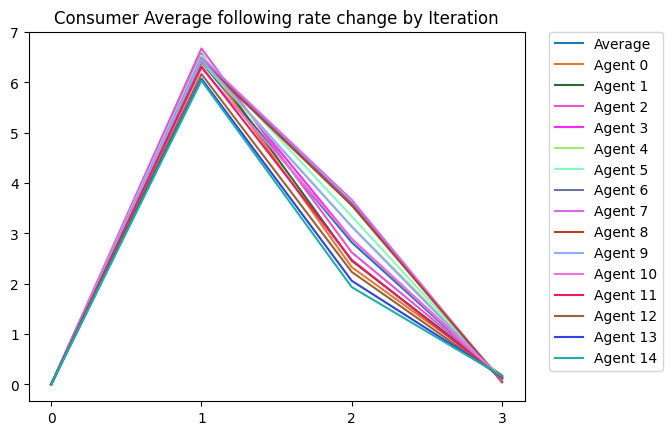

In [ ]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

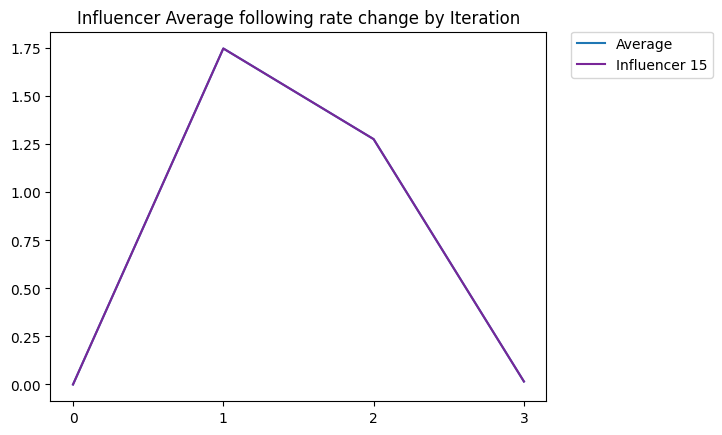

In [ ]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

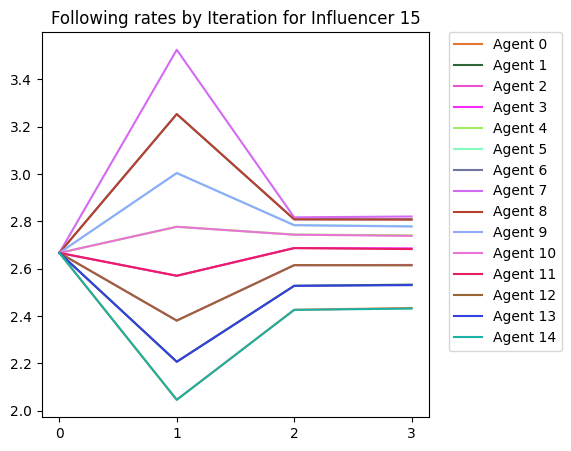

In [ ]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

In [ ]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

In [ ]:
content_market.influencers[0].get_following_rate_vector()

array([2.43357849, 2.53234048, 2.61568305, 2.68575271, 2.7410262 ,
       2.77984414, 2.80900946, 2.82049227, 2.80732794, 2.7780217 ,
       2.73860397, 2.68279517, 2.6139618 , 2.53025829, 2.43130433,
       0.        , 0.        ])

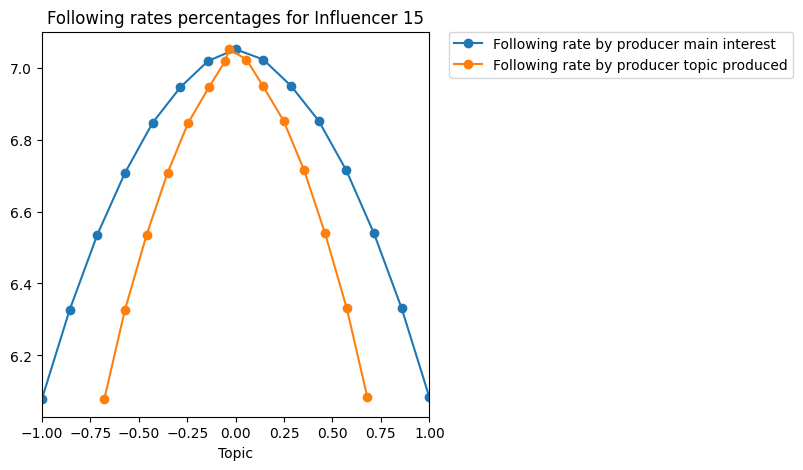

In [ ]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

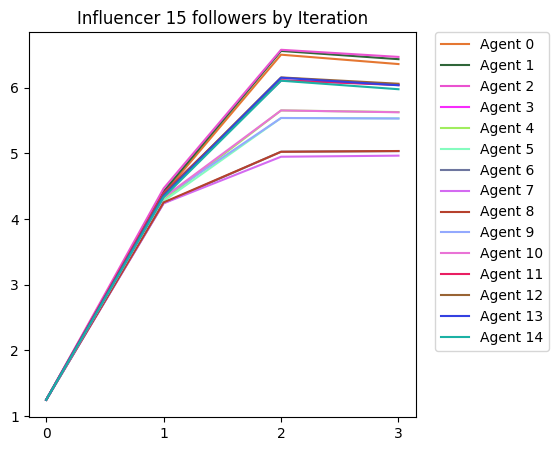

In [ ]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

In [ ]:
[p.topic_produced for p in content_market.producers]

[array([0.67991048]),
 array([0.57388311]),
 array([0.46185355]),
 array([0.35384909]),
 array([0.24732727]),
 array([0.14054636]),
 array([0.05619513]),
 array([-0.03318756]),
 array([-0.05379902]),
 array([-0.13808685]),
 array([-0.24485303]),
 array([-0.35135932]),
 array([-0.45952291]),
 array([-0.57157625]),
 array([-0.67773691])]

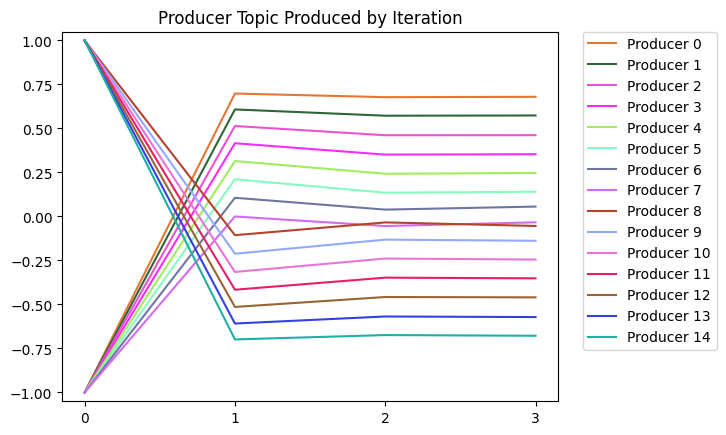

In [ ]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

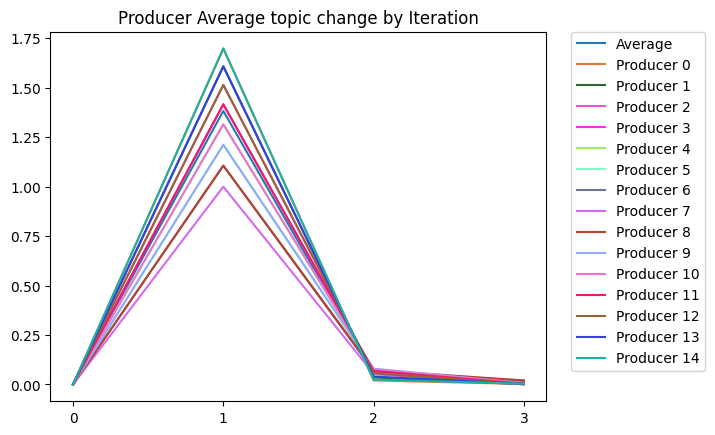

In [ ]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

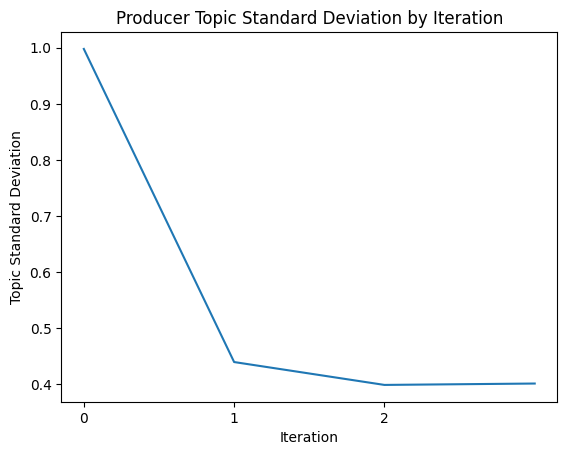

In [ ]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

In [ ]:
stats.total_social_welfare[-1]

152.47586992219132

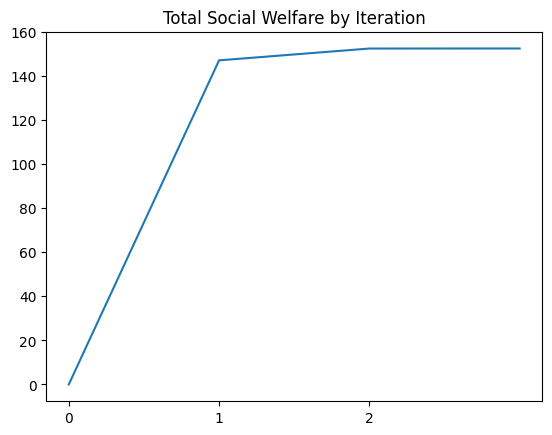

In [ ]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

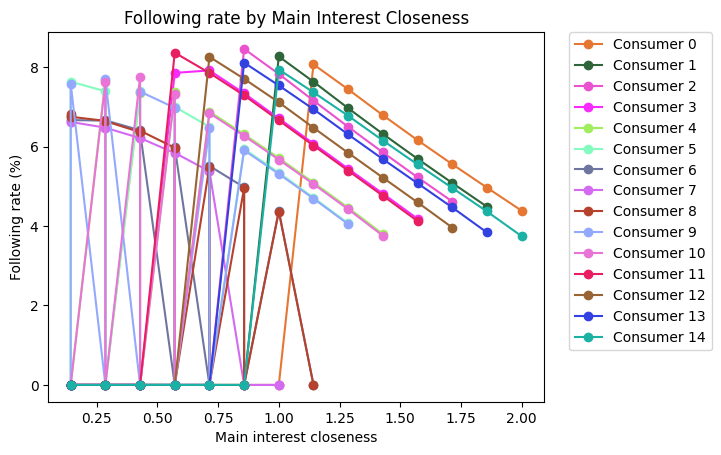

In [ ]:
#averages = ([x[0] for x in stats.average_following_rate_by_main_interest_closeness], [x[1] for x in stats.average_following_rate_by_main_interest_closeness])
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats) #averages=averages)

In [ ]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

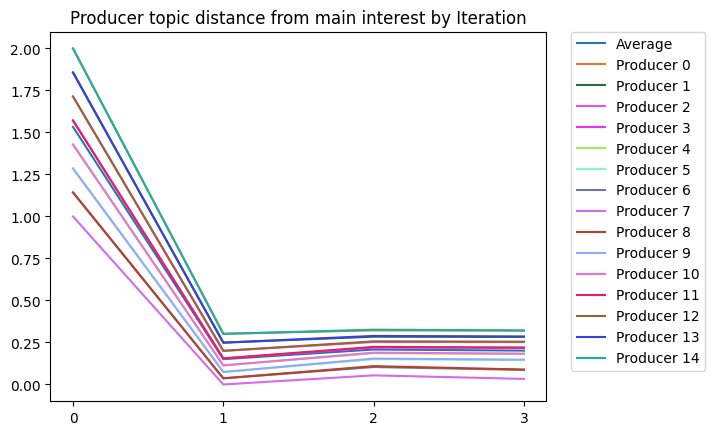

In [ ]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

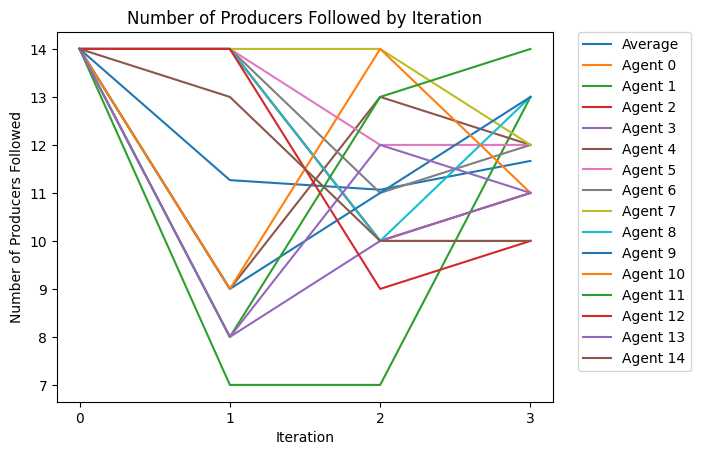

In [ ]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1.         -0.52270185]
 [-0.52270185  1.        ]]


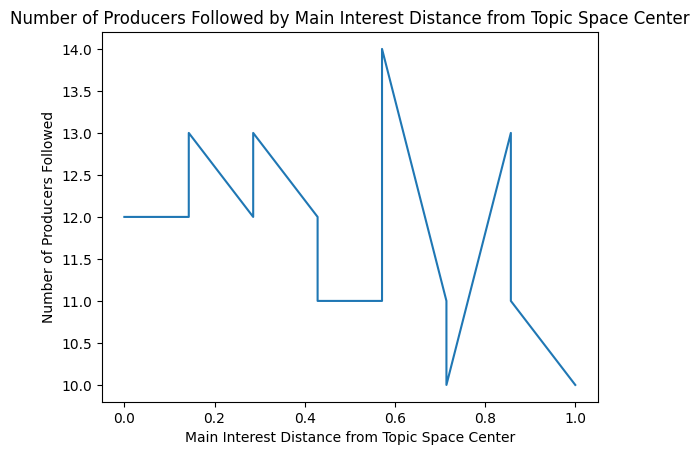

In [ ]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

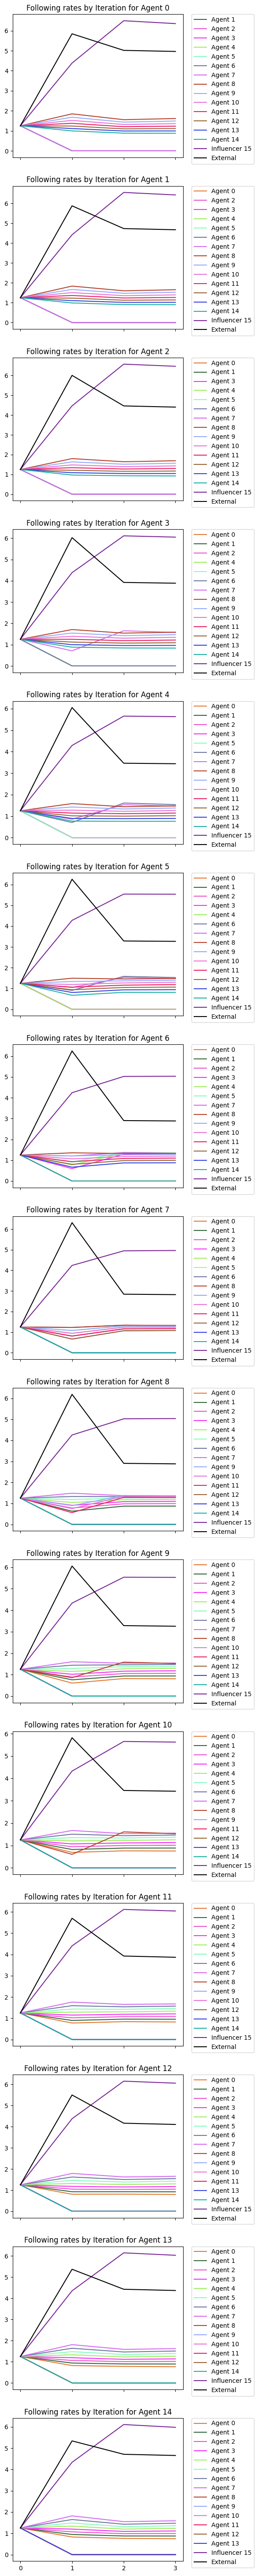

In [ ]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

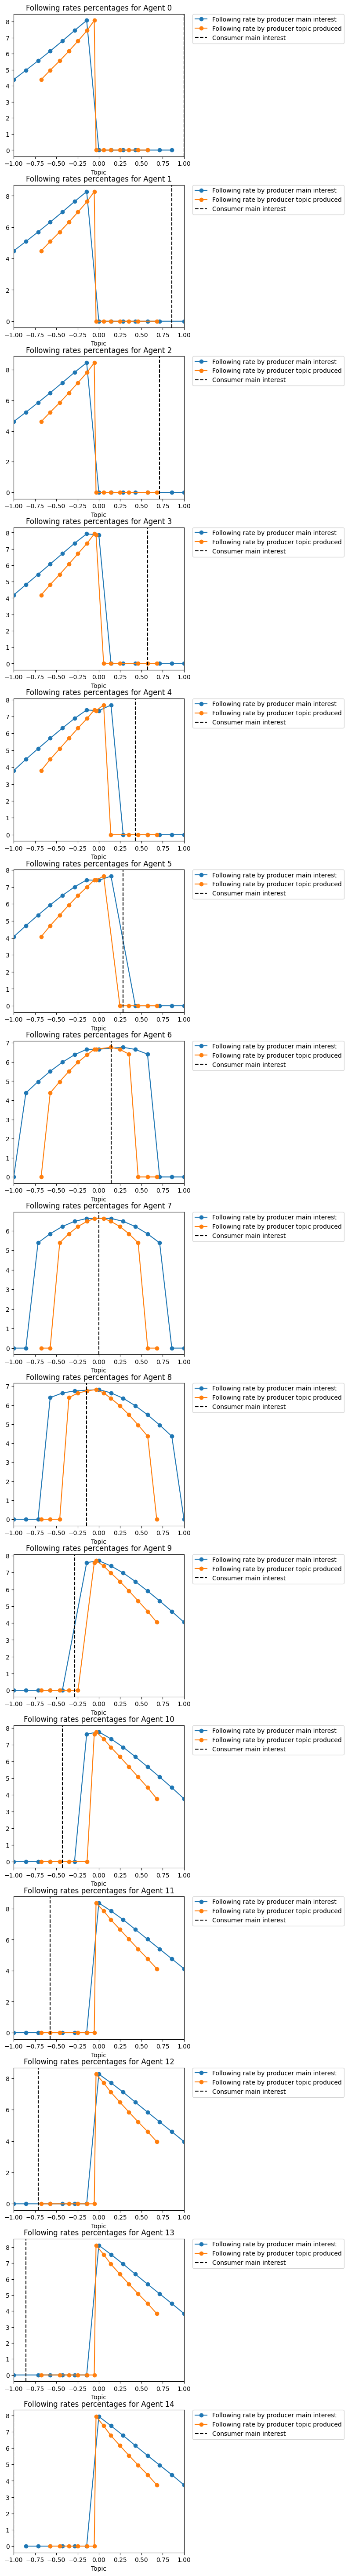

In [ ]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

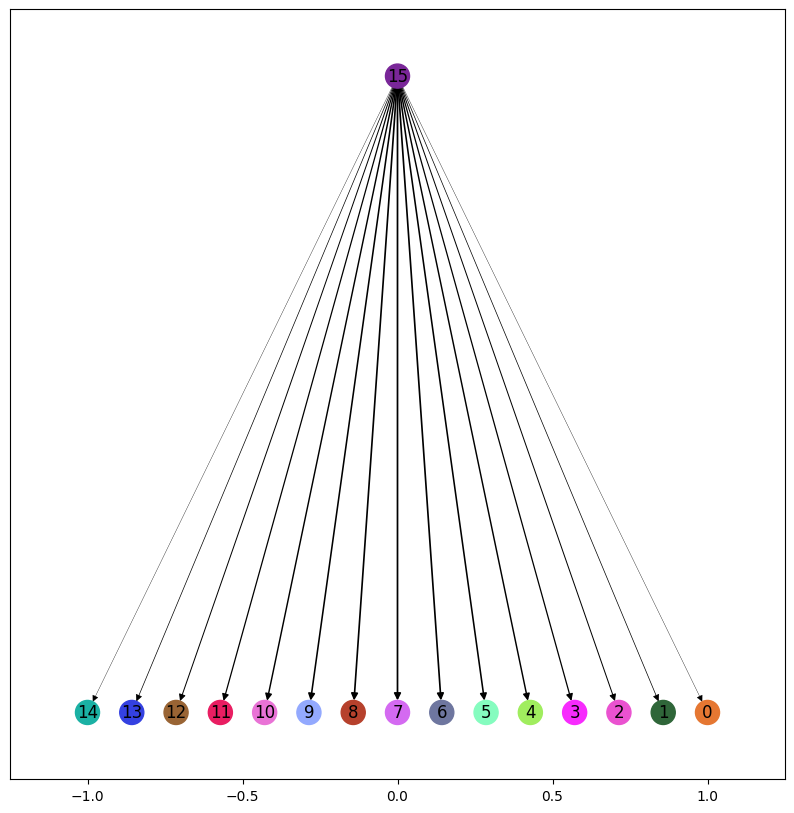

In [ ]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

In [ ]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

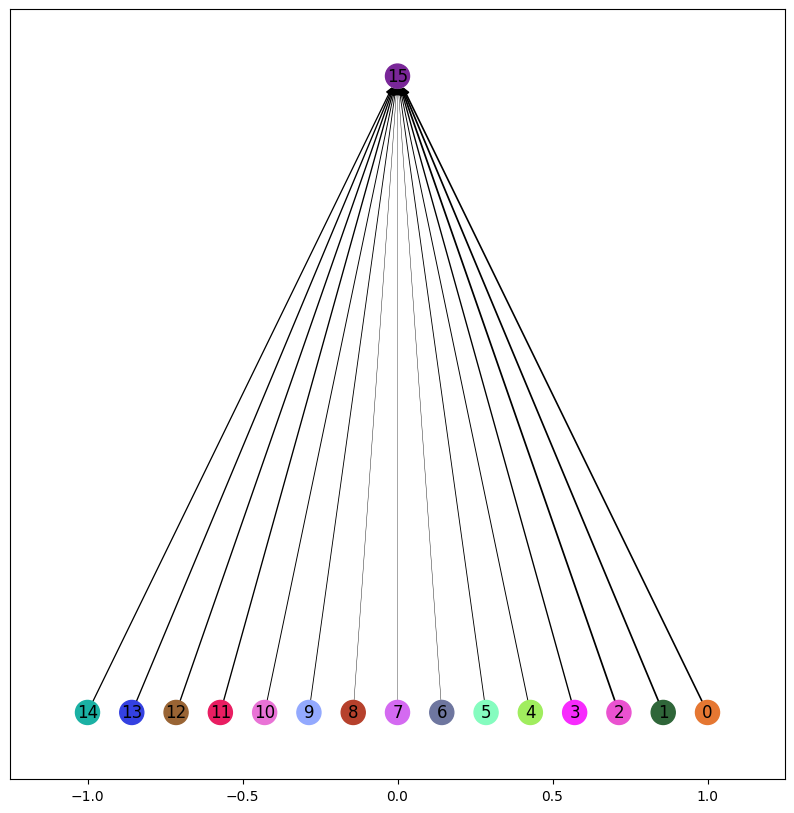

In [ ]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

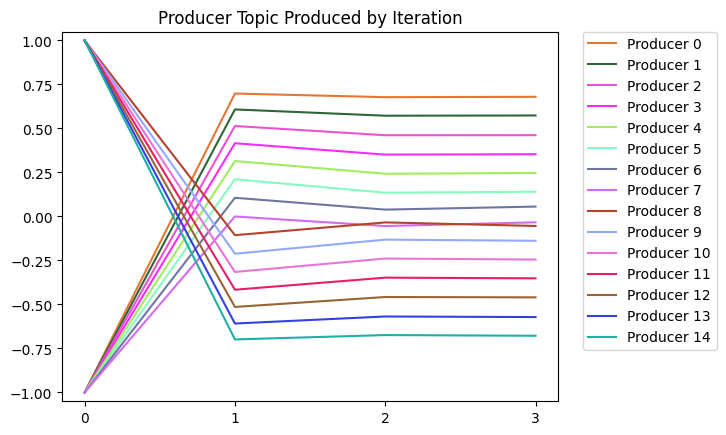

In [ ]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

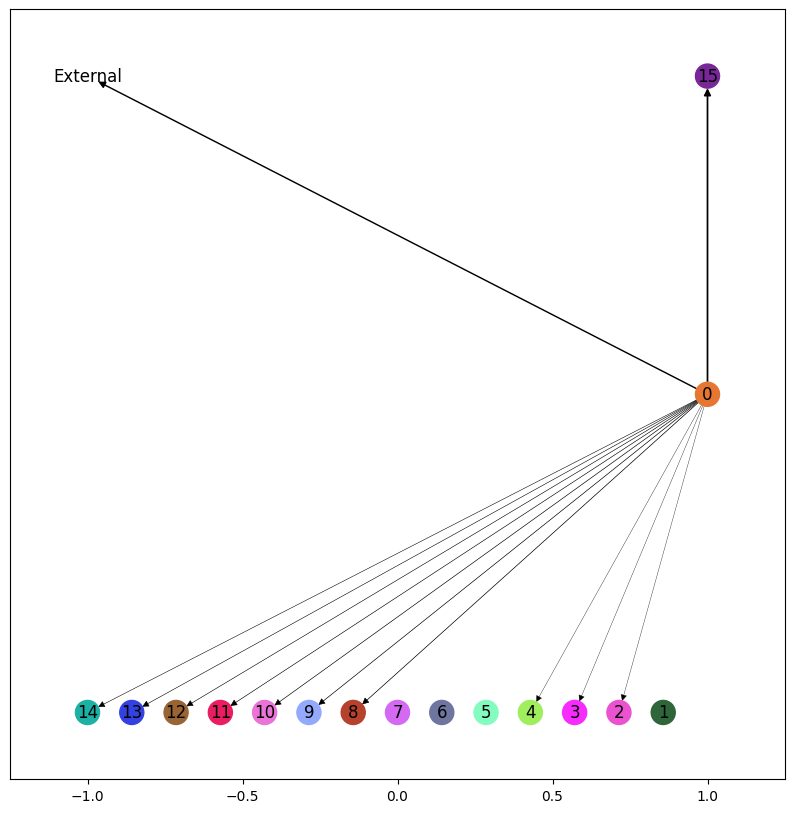

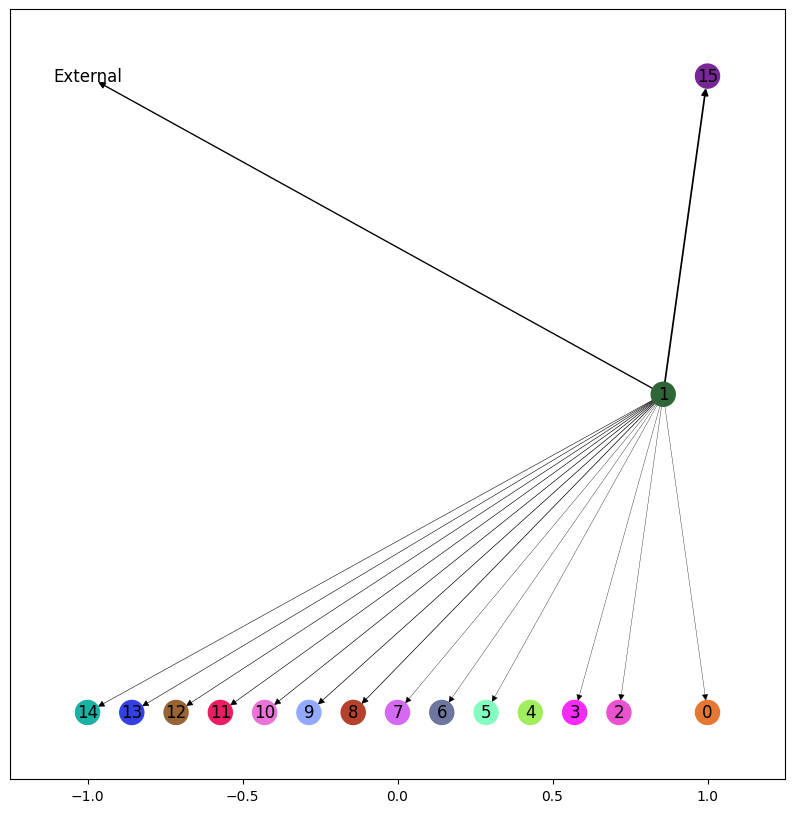

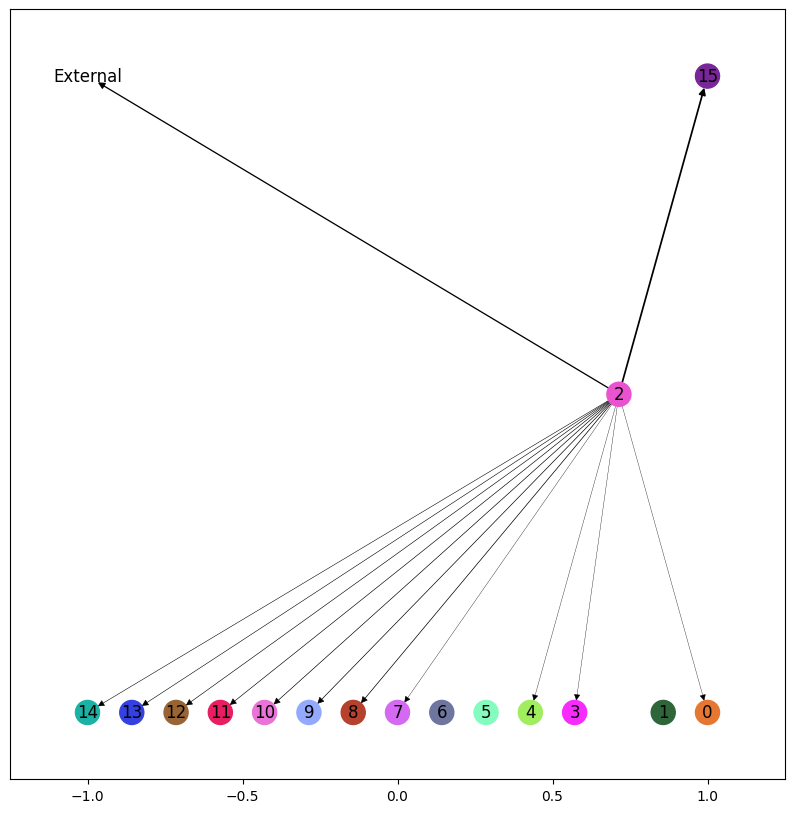

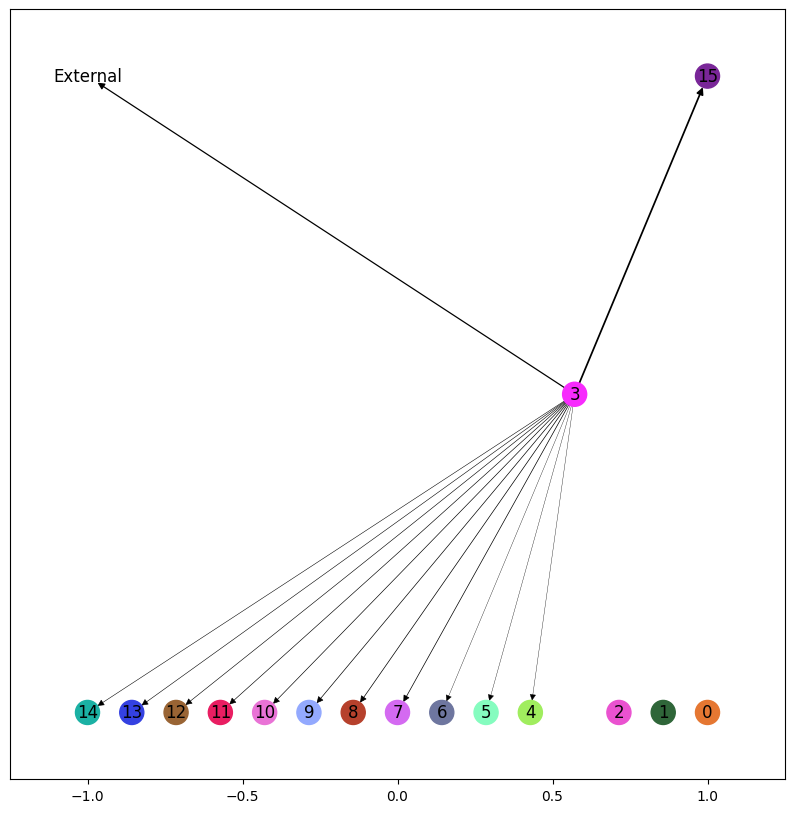

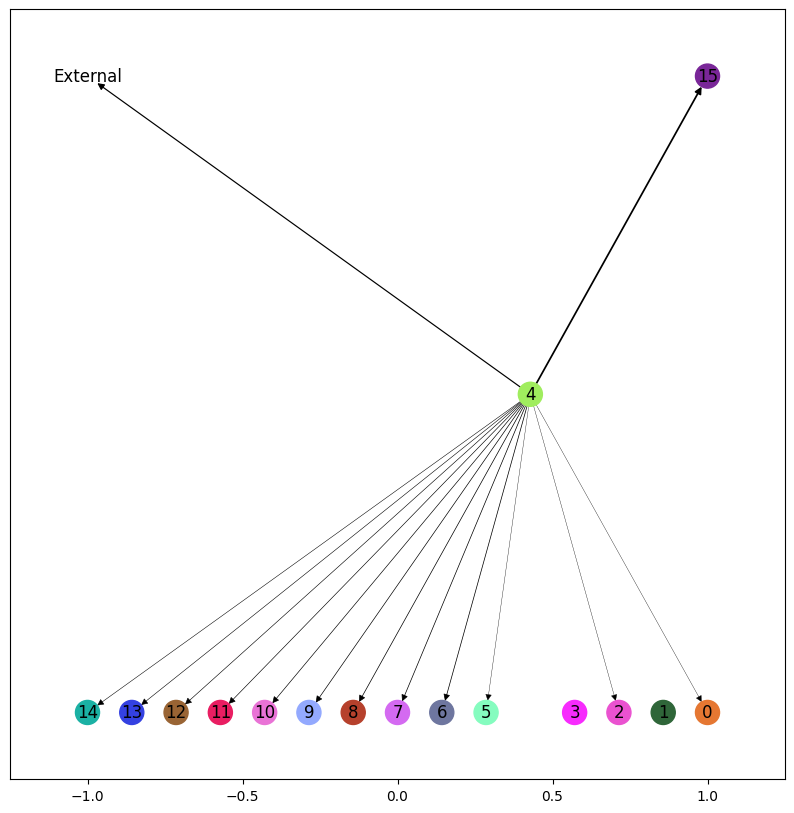

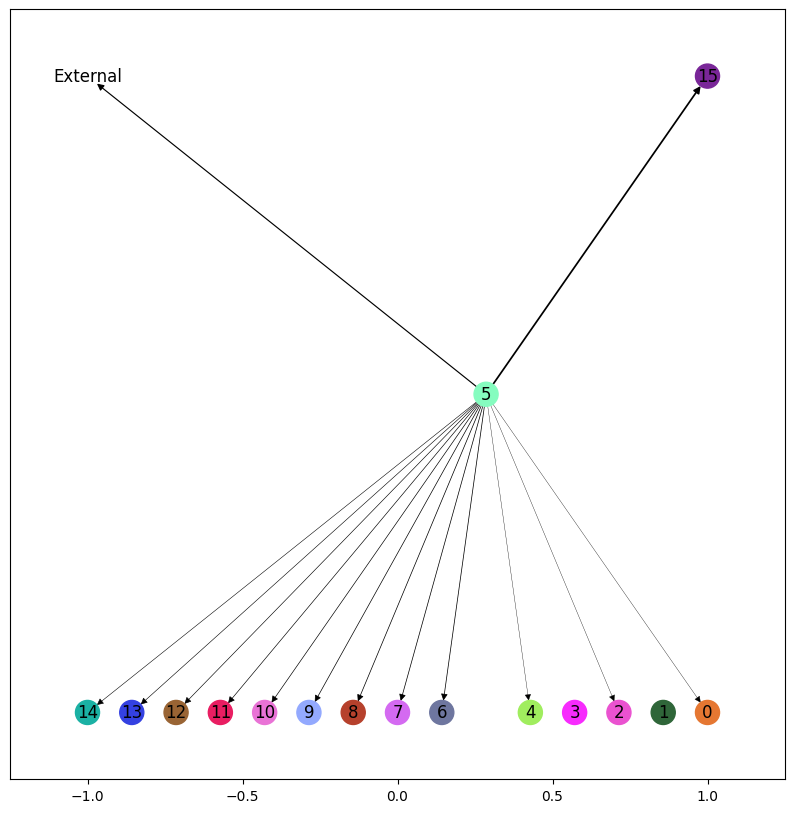

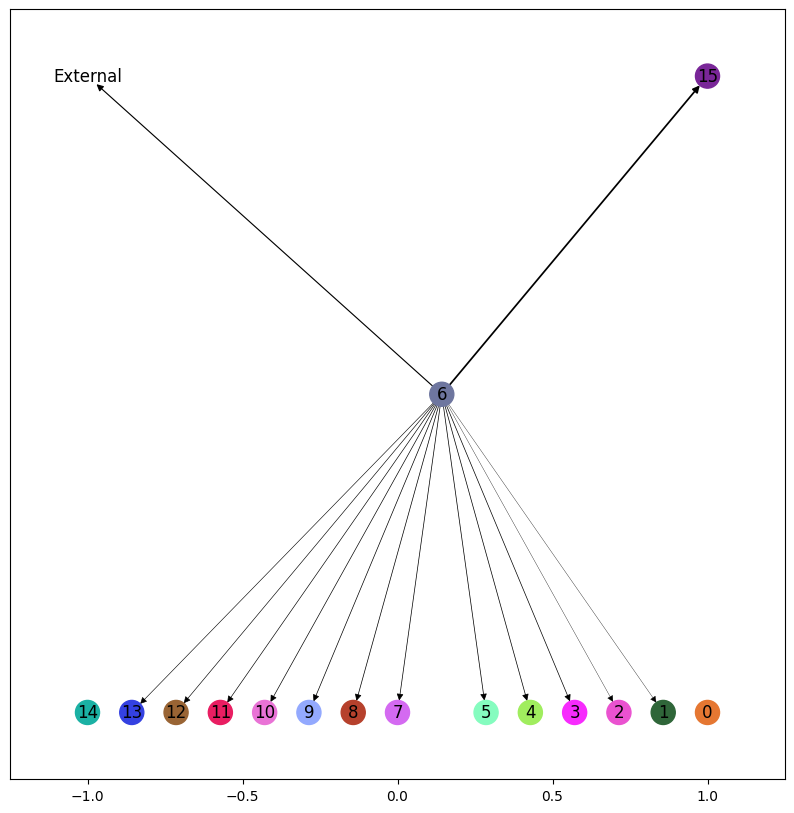

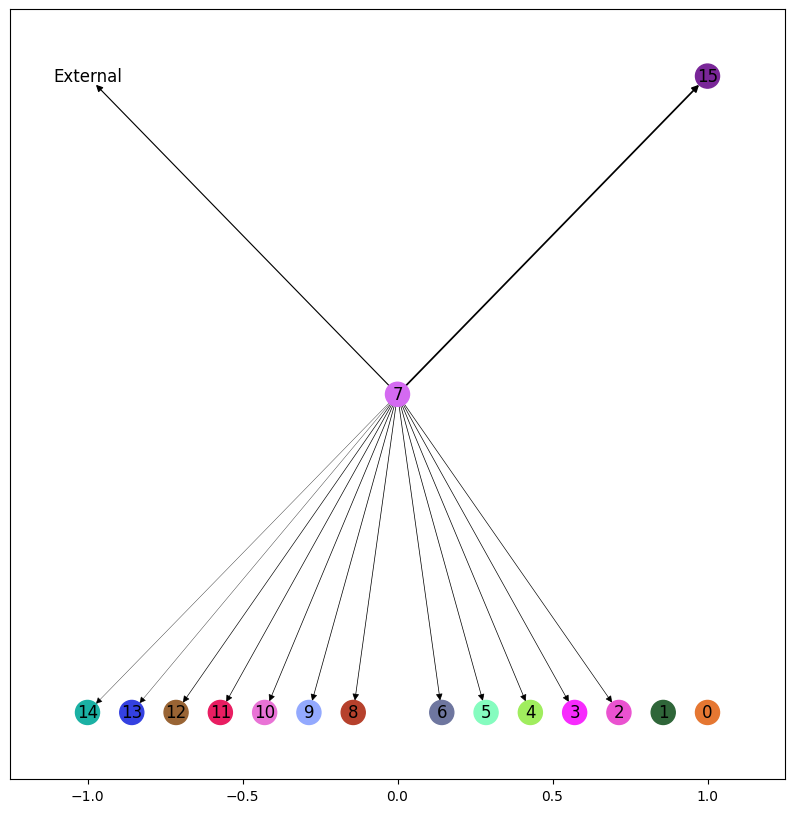

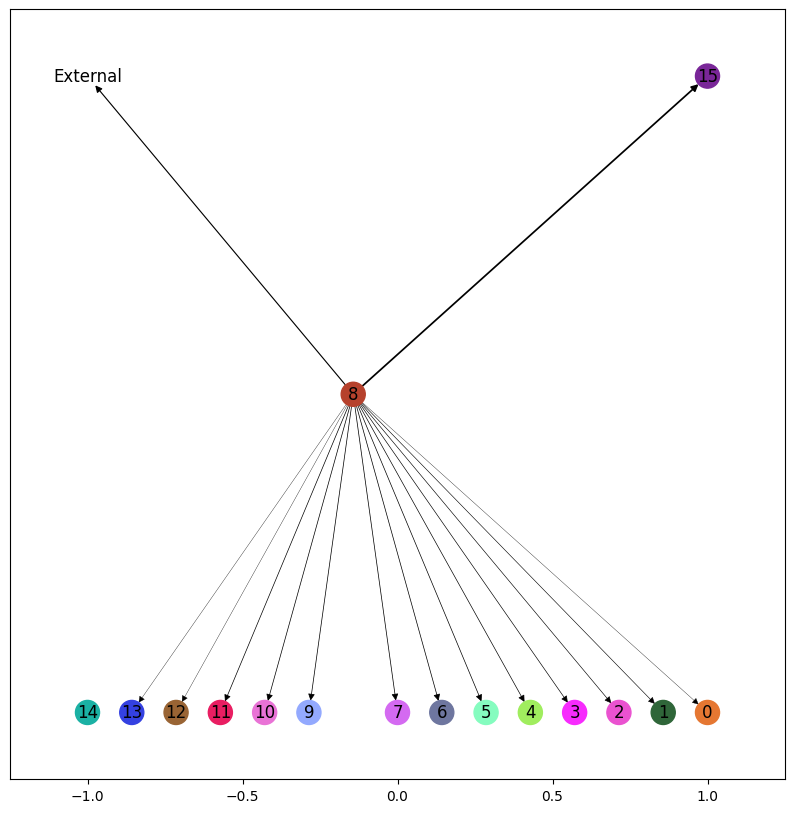

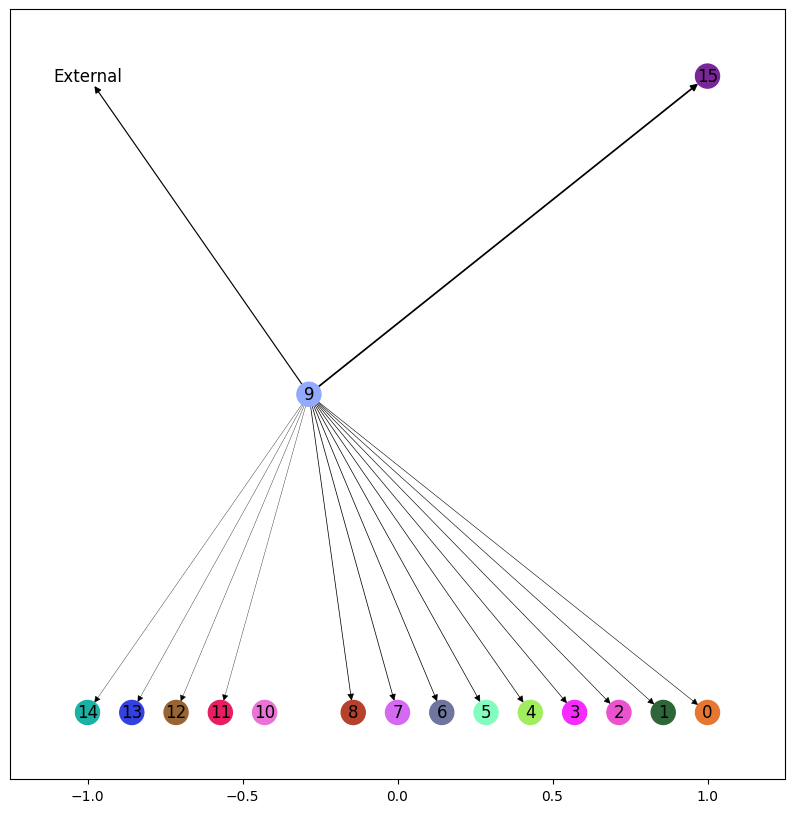

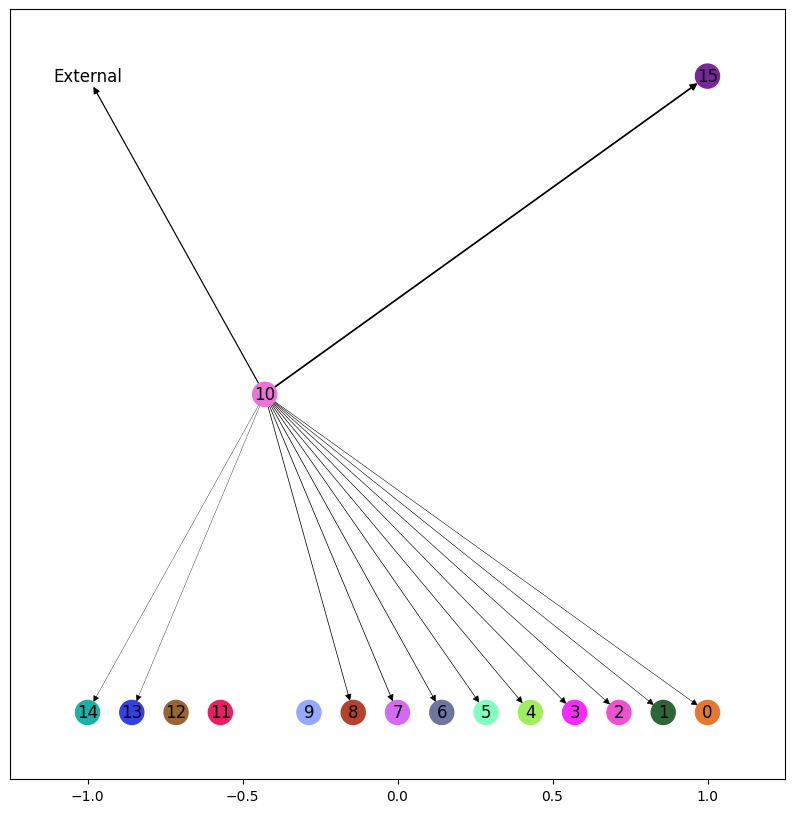

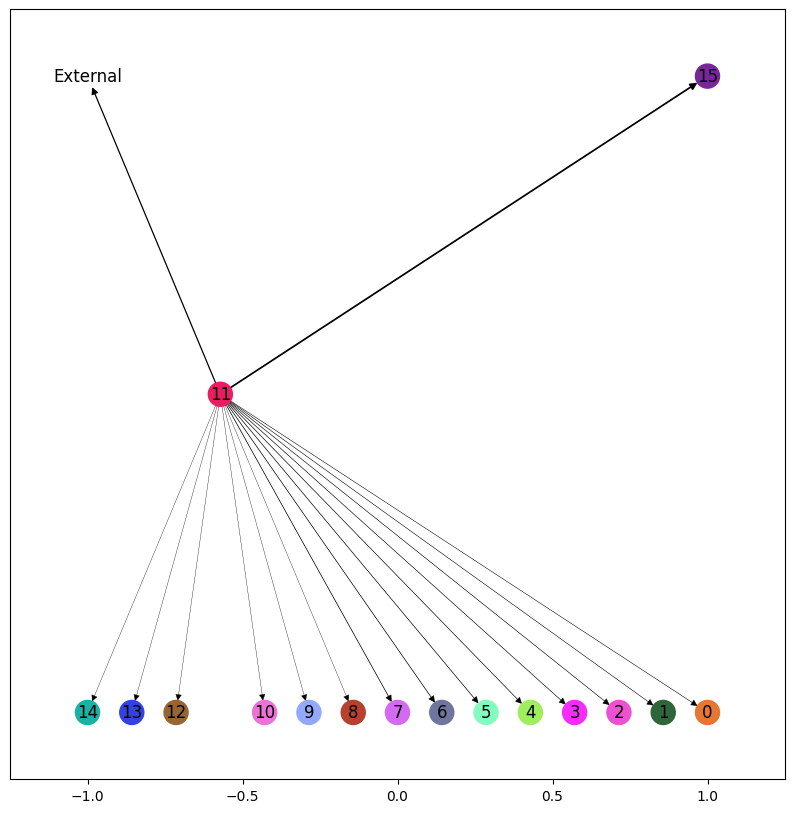

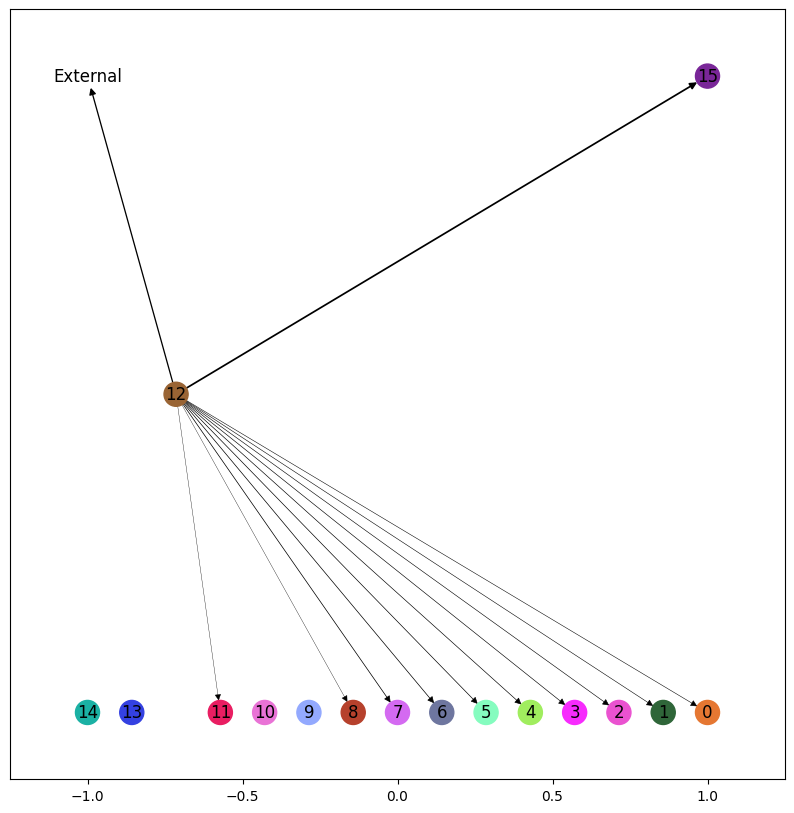

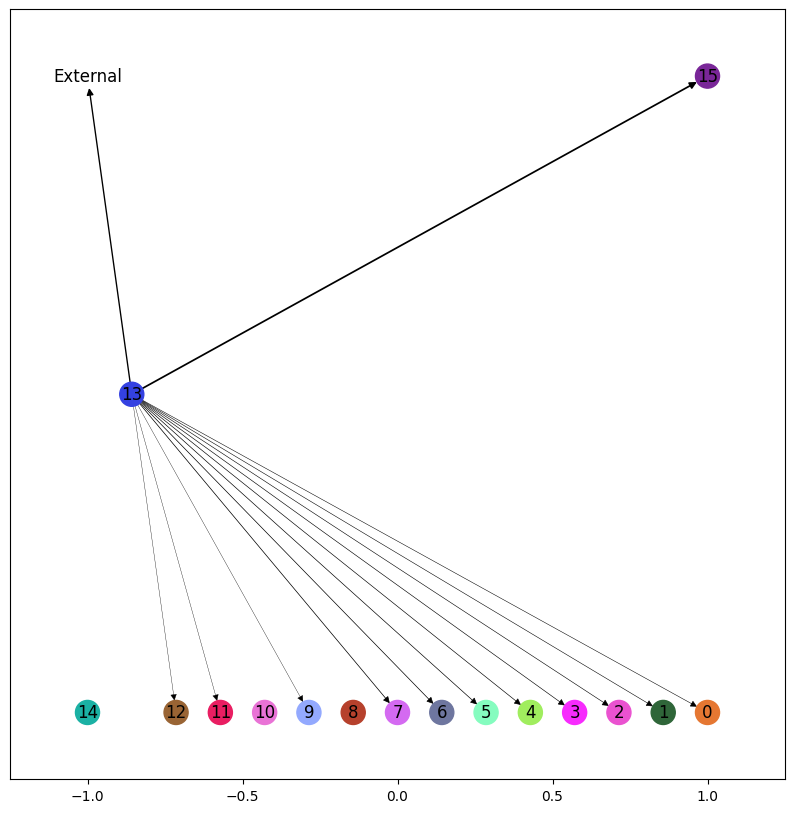

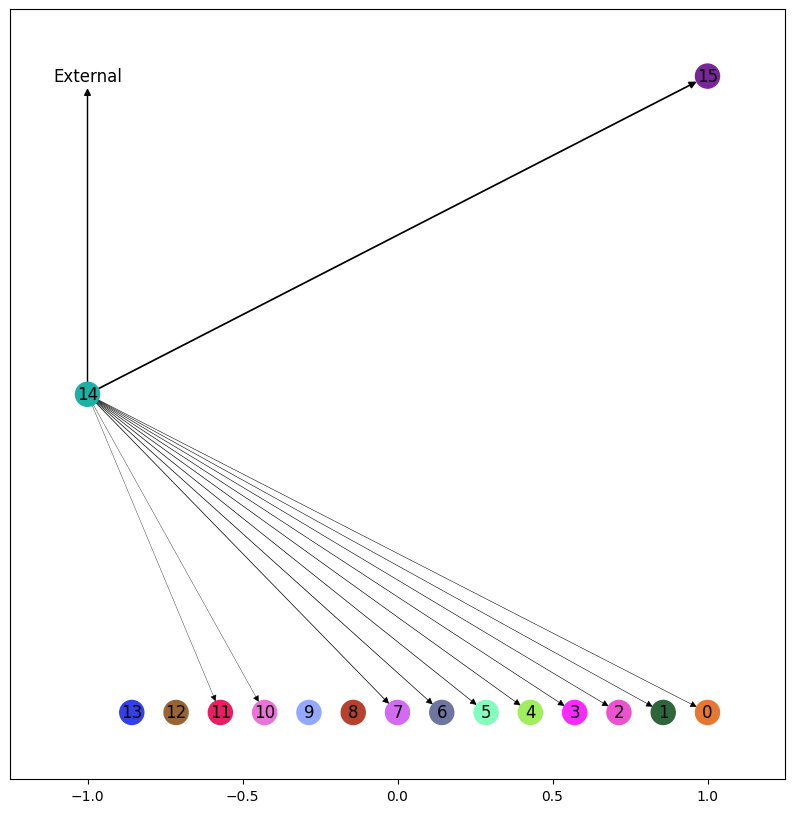

In [ ]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

In [ ]:
stats.to_dict()

{'num_iterations': 3,
 'total_consumer_utility': [0,
  147.08548959939077,
  152.45206945975667,
  152.47586992219132],
 'total_producer_utility': [0,
  109.10968600467513,
  118.0568037743805,
  118.17233387045361],
 'total_influencer_utility': [0,
  78.29774850058583,
  82.79981010294043,
  82.77649884227422],
 'total_social_welfare': [0,
  147.08548959939077,
  152.45206945975667,
  152.47586992219132],
 'average_consumer_rate_change': [0,
  6.397891171847238,
  2.8225035840442465,
  0.11949135115403559],
 'average_producer_topic_change': [0,
  1.3826400988963639,
  0.0574813641534477,
  0.006662046195100962],
 'average_influencer_rate_change': [0,
  1.7484328891725385,
  1.2767137271083533,
  0.015540805143155617],
 'average_consumer_utility_change': [0,
  9.805699306626051,
  0.35777199069105964,
  0.001586697495645654],
 'average_producer_utility_change': [0,
  7.273979066978342,
  0.5964745179803596,
  0.007702006404873115],
 'average_influencer_utility_change': [0,
  78.2977485

In [ ]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.85714286]),
 array([-0.71428571]),
 array([-0.57142857]),
 array([-0.42857143]),
 array([-0.28571429]),
 array([-0.14285714]),
 array([0.]),
 array([0.14285714]),
 array([0.28571429]),
 array([0.42857143]),
 array([0.57142857]),
 array([0.71428571]),
 array([0.85714286]),
 array([1.])]